In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

from jupyterthemes import jtplot
jtplot.style()

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
reload(C)

OUTPUT_DIR = '../DATA/Figure1_Position_Common_Scale/'

# Dataset 1

We create a very simple dataset without X variability. Also the spot size is constant.

This means, we only vary the Y position. 

Label 32


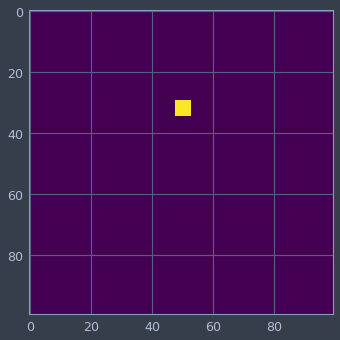

In [96]:
fig = C.Figure1_Position_Common_Scale()
fig.create(verbose=True)
fig.show()

In [97]:
#
# Make many datapoints
#
t0 = time.time()
datapoints, labels = fig.make_many(N=100000)
print 'Creating Datapoints done in', time.time()-t0, 'seconds'

#
# Generate images without frame.
#
t0 = time.time()
images, labels = fig.render_many(datapoints)
print 'Image Generation done in', time.time()-t0, 'seconds'

Creating Datapoints done in 1.37078404427 seconds
Image Generation done in 1.20875501633 seconds


Datapoint 4176
Label 45


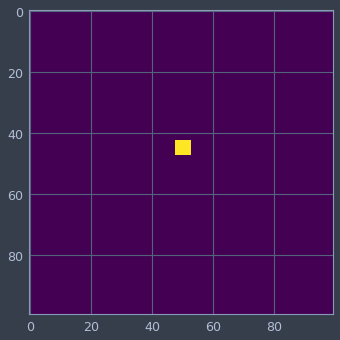

In [112]:
INDEX = np.random.randint(len(datapoints))
print 'Datapoint', INDEX
print 'Label', labels[INDEX]

imshow(images[INDEX])

In [113]:
images_raveled = images.reshape(100000,100*100).astype(np.float32)
images_raveled -= .5

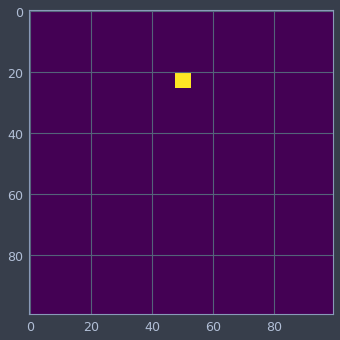

In [114]:
a = images_raveled.reshape(100000,100,100)
imshow(a[16387])

In [115]:
images_3d = np.stack((images,)*3, -1)
images_3d_raveled = images_3d.reshape(100000, 100*100*3).astype(np.float32)
images_3d_raveled -= .5

In [116]:
images_3d_raveled.max()

0.5

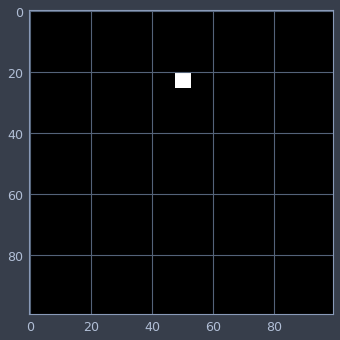

In [117]:
a = images_3d_raveled.reshape(100000,100,100,3)
imshow(a[16387]+.5)

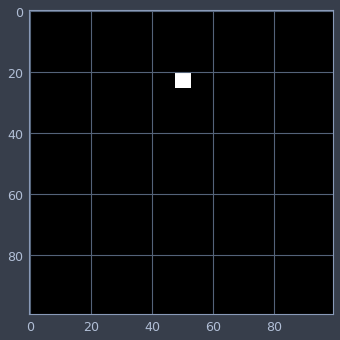

In [119]:
# test for memmap access!
indices = [16387, 16388]
imshow(images_3d_raveled[indices].reshape(len(indices), 100, 100, 3)[0]+.5)

In [120]:
INDEX = 1

# let's store the datapoints
with open(OUTPUT_DIR+'datapoints_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(datapoints, f)
print 'stored datapoints'
with open(OUTPUT_DIR+'labels_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(labels, f)
print 'stored labels'
  
# Then, let's store the vanilla image data
#
# This data is randomized but matches the labels
# and is normalized to -.5 .. .5
np.save(OUTPUT_DIR+'images_'+str(INDEX)+'.npy', images_raveled, allow_pickle=False)
# .. now the vanilla images 3D
np.save(OUTPUT_DIR+'images_rgb_'+str(INDEX)+'.npy', images_3d_raveled, allow_pickle=False)

print 'storeds image arrays 2d/3d'

stored datapoints
stored labels
storeds image arrays 2d/3d


In [121]:
X = images_3d_raveled.reshape(100000,100,100,3)

In [122]:
import keras.applications
VGG19 = keras.applications.VGG19(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = VGG19.predict(X, verbose=True)
print 'Done after', time.time()-t0

100000/100000 [==============================] - 274s 3ms/step
Done after 273.886236191


In [123]:
np.save(OUTPUT_DIR+'vgg19_features'+str(INDEX)+'.npy', features, allow_pickle=False)

In [124]:
Xception = keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = Xception.predict(X, verbose=True)
print 'Done after', time.time()-t0

np.save(OUTPUT_DIR+'xception_features'+str(INDEX)+'.npy', features, allow_pickle=False)

100000/100000 [==============================] - 218s 2ms/step
Done after 218.340283155


In [125]:
features.shape

(100000, 3, 3, 2048)

In [77]:
labels.min()

20

In [71]:
labels.min()

20

In [78]:
labels_normalized = labels.astype(np.float32)/80

In [80]:
labels_normalized.min()*80

20.0

In [ ]:
79

# Dataset 2
We add Y variability.

This means, we not only vary the value of the bars but also the Y coordinate.

# Parameters 15625
Label 1
Label 1


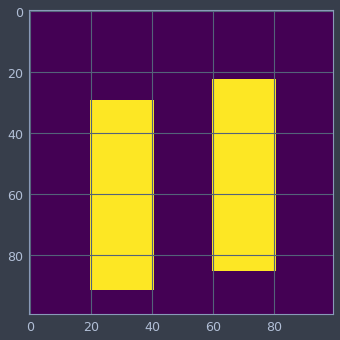

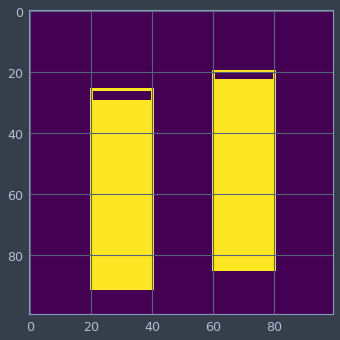

In [7]:
fig = C.Figure12(variable_y=True)
fig.create(verbose=True)
fig.framed = False
fig.show()
fig.framed = True
fig.show()

In [8]:
#
# Make many datapoints
#
t0 = time.time()
datapoints, labels = fig.make_many(N=100000)
print 'Creating Datapoints done in', time.time()-t0, 'seconds'

#
# Generate images without frame.
#
t0 = time.time()
images, labels = fig.render_many(datapoints, framed=False)
print 'Image Generation done in', time.time()-t0, 'seconds'

#
# Generate images with frame.
#
t0 = time.time()
framed_images, framed_labels = fig.render_many(datapoints, framed=True)
print 'Framed Image Generation Done in', time.time()-t0, 'seconds'

Creating Datapoints done in 2.77886605263 seconds
Image Generation done in 3.74050712585 seconds
Framed Image Generation Done in 3.7560300827 seconds


Datapoint 22357
Label False


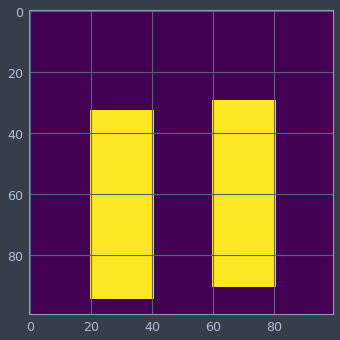

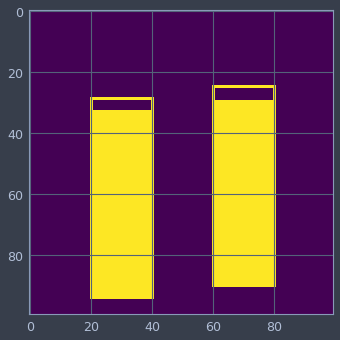

In [9]:
INDEX = np.random.randint(len(datapoints))
print 'Datapoint', INDEX
print 'Label', labels[INDEX]

imshow(images[INDEX])
plt.figure()
imshow(framed_images[INDEX])

In [10]:
#
# Let's store the datapoints
#
datapoints_file = os.path.join(OUTPUT_DIR, 'datapoints_2.p')
labels_file = os.path.join(OUTPUT_DIR, 'labels_2.p')
if not os.path.exists(datapoints_file):
  with open(datapoints_file, 'w') as f:
    pickle.dump(datapoints, f)

  print 'Stored Datapoints.', os.path.abspath(datapoints_file)
    
if not os.path.exists(labels_file):
  with open(labels_file, 'w') as f:
    pickle.dump(labels, f)

  print 'Stored Labels.', os.path.abspath(labels_file)

Stored Datapoints. /home/d/Projects/CP/DATA/Figure12/datapoints_2.p
Stored Labels. /home/d/Projects/CP/DATA/Figure12/labels_2.p


# Dataset 3
We add also variable width in addition to Y variability.

This means, we not only vary the value of the bars, the Y coordinates, but also the width of the rectangles.

# Parameters 1562500
Label 0
Label 0


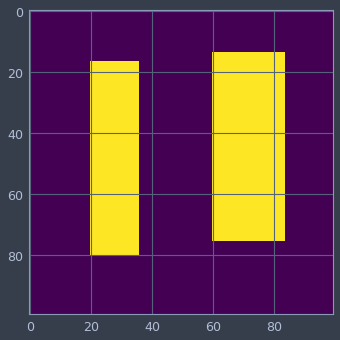

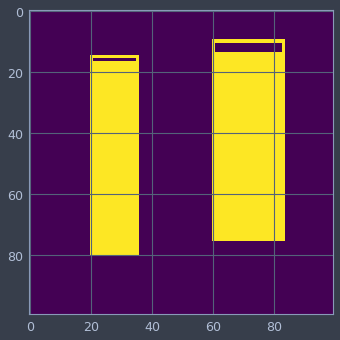

In [12]:
fig = C.Figure12(variable_y=True, variable_width=True)
fig.create(verbose=True)
fig.framed = False
fig.show()
fig.framed = True
fig.show()

In [13]:
#
# Make many datapoints
#
t0 = time.time()
datapoints, labels = fig.make_many(N=100000)
print 'Creating Datapoints done in', time.time()-t0, 'seconds'

#
# Generate images without frame.
#
t0 = time.time()
images, labels = fig.render_many(datapoints, framed=False)
print 'Image Generation done in', time.time()-t0, 'seconds'

#
# Generate images with frame.
#
t0 = time.time()
framed_images, framed_labels = fig.render_many(datapoints, framed=True)
print 'Framed Image Generation Done in', time.time()-t0, 'seconds'

Creating Datapoints done in 3.45579791069 seconds
Image Generation done in 3.71790504456 seconds
Framed Image Generation Done in 3.73693394661 seconds


Datapoint 31278
Label True


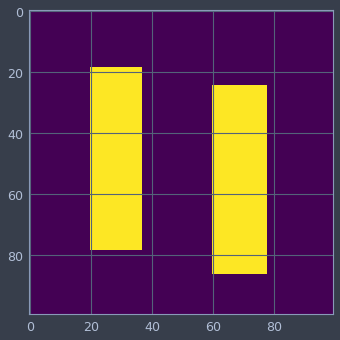

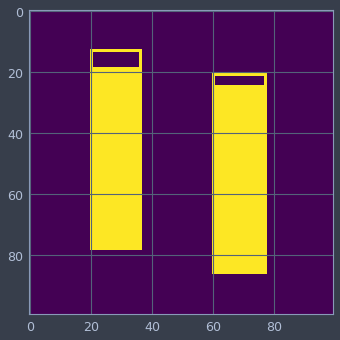

In [14]:
INDEX = np.random.randint(len(datapoints))
print 'Datapoint', INDEX
print 'Label', labels[INDEX]

imshow(images[INDEX])
plt.figure()
imshow(framed_images[INDEX])

In [16]:
#
# Let's store the datapoints
#
datapoints_file = os.path.join(OUTPUT_DIR, 'datapoints_3.p')
labels_file = os.path.join(OUTPUT_DIR, 'labels_3.p')
if not os.path.exists(datapoints_file):
  with open(datapoints_file, 'w') as f:
    pickle.dump(datapoints, f)

  print 'Stored Datapoints.', os.path.abspath(datapoints_file)
    
if not os.path.exists(labels_file):
  with open(labels_file, 'w') as f:
    pickle.dump(labels, f)

  print 'Stored Labels.', os.path.abspath(labels_file)

Stored Datapoints. /home/d/Projects/CP/DATA/Figure12/datapoints_3.p
Stored Labels. /home/d/Projects/CP/DATA/Figure12/labels_3.p


# Dataset 4
We add also X variability to variable width and to Y variability.

This means, we not only vary the value of the bars, the Y coordinates, but also the width of the rectangles as well as the X coordinates.

# Parameters 156250000
Label 1
Label 1


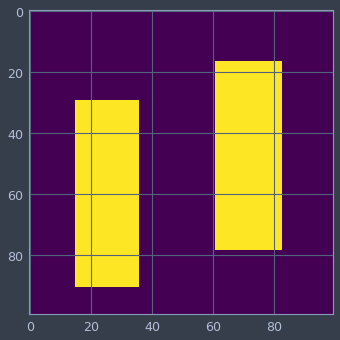

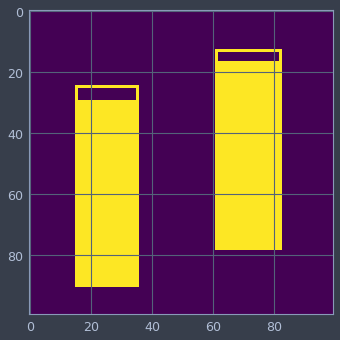

In [18]:
fig = C.Figure12(variable_y=True, variable_width=True, variable_x=True)
fig.create(verbose=True)
fig.framed = False
fig.show()
fig.framed = True
fig.show()

In [19]:
#
# Make many datapoints
#
t0 = time.time()
datapoints, labels = fig.make_many(N=100000)
print 'Creating Datapoints done in', time.time()-t0, 'seconds'

#
# Generate images without frame.
#
t0 = time.time()
images, labels = fig.render_many(datapoints, framed=False)
print 'Image Generation done in', time.time()-t0, 'seconds'

#
# Generate images with frame.
#
t0 = time.time()
framed_images, framed_labels = fig.render_many(datapoints, framed=True)
print 'Framed Image Generation Done in', time.time()-t0, 'seconds'

Creating Datapoints done in 4.37487792969 seconds
Image Generation done in 3.76763606071 seconds
Framed Image Generation Done in 3.77200603485 seconds


Datapoint 87639
Label True


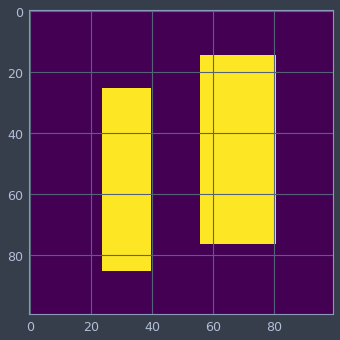

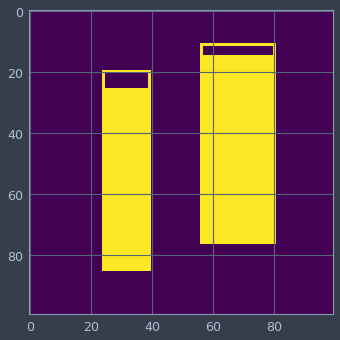

In [20]:
INDEX = np.random.randint(len(datapoints))
print 'Datapoint', INDEX
print 'Label', labels[INDEX]

imshow(images[INDEX])
plt.figure()
imshow(framed_images[INDEX])

In [21]:
#
# Let's store the datapoints
#
datapoints_file = os.path.join(OUTPUT_DIR, 'datapoints_4.p')
labels_file = os.path.join(OUTPUT_DIR, 'labels_4.p')
if not os.path.exists(datapoints_file):
  with open(datapoints_file, 'w') as f:
    pickle.dump(datapoints, f)

  print 'Stored Datapoints.', os.path.abspath(datapoints_file)
    
if not os.path.exists(labels_file):
  with open(labels_file, 'w') as f:
    pickle.dump(labels, f)

  print 'Stored Labels.', os.path.abspath(labels_file)

Stored Datapoints. /home/d/Projects/CP/DATA/Figure12/datapoints_4.p
Stored Labels. /home/d/Projects/CP/DATA/Figure12/labels_4.p
